# Image to code generation

In [1]:
from google.colab import drive 
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# !unzip -u '/content/drive/My Drive/purecode/Assignment_Data.zip' -d '/content/drive/My Drive/purecode/dataset'

In [2]:
import tensorflow as tf 
print(tf.__version__)
import keras
keras.__version__

2.9.2


'2.9.0'

In [3]:
# imports
import os
from os import listdir
from numpy import array
import numpy as np
import cv2
import pandas as pd

from keras.preprocessing.text import Tokenizer, one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential, model_from_json
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam, RMSprop
from keras.layers.convolutional import Conv2D
from keras.layers import Embedding, TimeDistributed, RepeatVector, LSTM, concatenate, Input, Reshape
from keras.callbacks import ModelCheckpoint
from keras_preprocessing.image import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input


In [4]:
# paths for dataset
output_files= os.getcwd()+"/drive/My Drive/purecode/"
ds_train_imgs= os.getcwd()+"/drive/My Drive/purecode/dataset/D1/IMAGES/"
ds_train_labels= os.getcwd()+"/drive/My Drive/purecode/dataset/D1/TEXT_LABELS/"
vocab_bootstrap= os.getcwd()+"/drive/My Drive/purecode/"

# Data preparation

In [5]:
all_images =[file for file in os.listdir(ds_train_imgs) if file.endswith('.png')]
all_images.sort()
print(len(all_images))
all_images[0]
len(all_images)

300


300

In [6]:
all_labels =[file for file in os.listdir(ds_train_labels) if file.endswith('.gui')]
all_labels.sort()
print(len(all_images))
all_labels[0]

300


'01357379-D6C2-4B01-AA66-C8790642D0B1.gui'

In [7]:
#read images and converted into numpy array
def load_images(img):  
  im = cv2.imread(img)    
  im= cv2.resize(im, (224, 224))
  return im

# read labels
def load_doc(input_label_file):
  file= open(input_label_file,'r')
  text = file.read()  
  # Load the tokens and rap them in a start and end tag
  text = ' ' + text + ' '
  # Seperate all the words with a single space
  text = ' '.join(text.split())
  # Add a space after each comma
  text = text.replace(',', ' ,')
  return text 


In [8]:
# vocablury creation
import glob
char_list = []
files_list = glob.glob(ds_train_labels+"*.gui")
files_list
for file_elem in files_list:
  char_list.append(load_doc(file_elem))
print(len(char_list))
# char_list

listToStr = ' '.join([str(elem) for elem in char_list])

voc_D1= (set(listToStr.split()))
voc_D1=' '.join(voc_D1)
print(voc_D1)


300
btn-active small-title row { header btn-red double , btn-orange } quadruple btn-inactive btn-green single text


In [9]:
# load data the images with labels
def load_data(images_path, labels_path):
  images_array = []
  labels_text = []
  all_images =[file for file in os.listdir(ds_train_imgs) if file.endswith('.png')]
  all_images.sort()
  all_labels =[file for file in os.listdir(ds_train_labels) if file.endswith('.gui')]
  all_labels.sort()
  for i in range (len(all_images)): 
    images_array.append(load_images(ds_train_imgs+all_images[i]))   
    labels_text.append(load_doc(ds_train_labels+all_labels[i]))
  images_array = np.array(images_array, dtype=np.dtype('float'))   
  images_array = preprocess_input(images_array)    
  return images_array,labels_text




In [10]:
# Converting images and labels and saving
img_array,img_labels=load_data(ds_train_imgs, ds_train_labels)

#Saving images and labels
df = pd.DataFrame(img_labels, columns=['text_labels_D1']) 
df.to_csv(output_files+"text_labels_list_D1.csv")
np.save(output_files+'images_array_D1', img_array)

In [11]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels, test_size=0.05, random_state=42)

In [12]:
X_train.shape, len(y_train), X_test.shape, len(y_test)

((285, 224, 224, 3), 285, (15, 224, 224, 3), 15)

In [13]:
img_array.shape, len(img_labels)

((300, 224, 224, 3), 300)

In [14]:
img_array[0]

array([[[151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        ...,
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ]],

       [[151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        ...,
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ]],

       [[151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        ...,
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ]],

       ...,

       [[151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        ...,
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ],
        [151.061, 138.221, 131.32 ]],

       [[151.061, 138.221, 131.32 ],
  

'header { btn-active , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-red } } row { double { small-title , text , btn-orange } double { small-title , text , btn-green } } row { single { small-title , text , btn-orange } }'

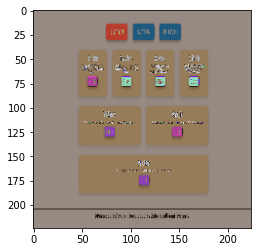

In [15]:
plt.imshow(img_array[0,:,:,:].astype('uint8'))
img_labels[0]

'header { btn-inactive , btn-active , btn-inactive , btn-inactive } row { single { small-title , text , btn-orange } } row { double { small-title , text , btn-green } double { small-title , text , btn-orange } }'

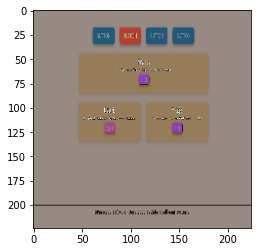

In [16]:
plt.imshow(X_test[0,:,:,:].astype('uint8'))
y_test[0]

['header', '{', 'btn', '-', 'inactive', ',', 'btn', '-', 'active', '}', 'row', '{', 'double', '{', 'small', '-', 'title', ',', 'text', ',', 'btn', '-', 'red', '}', 'double', '{', 'small', '-', 'title', ',', 'text', ',', 'btn', '-', 'green', '}', '}']


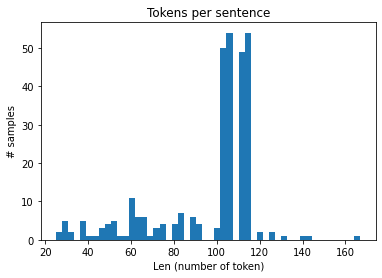

In [17]:
import re
import string

# Custom Tokenizer
re_tok = re.compile(f'([{string.punctuation}“”])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

print(tokenize(img_labels[1]))
# Plot sentence by lenght
plt.hist([len(tokenize(s)) for s in img_labels], bins=50)
plt.title('Tokens per sentence')
plt.xlabel('Len (number of token)')

plt.ylabel('# samples')
plt.show()

In [18]:
# Initialize the function to create the vocabulary 
tokenizer = Tokenizer(filters='', split=" ", lower=False)
# Create the vocabulary 
tokenizer.fit_on_texts([load_doc(vocab_bootstrap+'bootstrap_D1.vocab')])

# Add one spot for the empty word in the vocabulary 
VOCAB_SIZE = len(tokenizer.word_index) + 1


In [19]:
tokenizer.word_index 

{'<START>': 1,
 ',': 2,
 '{': 3,
 '}': 4,
 'header': 5,
 'single': 6,
 'btn-inactive': 7,
 'btn-orange': 8,
 'small-title': 9,
 'double': 10,
 'quadruple': 11,
 'text': 12,
 'btn-green': 13,
 'btn-red': 14,
 'btn-active': 15,
 'row': 16,
 '<END>': 17}

In [20]:
#preprocessing the data
def preprocess_data(texts, images, max_sequence, MAX_lEN=50):
    X, y, image_data = list(), list(), list()
    sequences = tokenizer.texts_to_sequences(texts)
    for img_no, seq in enumerate(sequences):
        for i in range(1, len(seq)):
            # Add the sentence until the current count(i) and add the current count to the output
            in_seq, out_seq = seq[:i], seq[i]
            # Pad all the input token sentences to max_sequence
            in_seq = pad_sequences([in_seq], maxlen=max_sequence)[0]
            # Turn the output into one-hot encoding
            out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]
            # Add the corresponding image to the boostrap token file
            image_data.append(images[img_no])
            # Cap the input sentence to MAX_LEN tokens and add it
            MAX_LEN=50
            X.append(in_seq[-MAX_LEN:])
            y.append(out_seq)
    return np.array(image_data), np.array(X), np.array(y)

In [21]:
# Data generator, call to model.fit_generator()
def data_generator(descriptions, features, n_step, max_sequence, MAX_LEN):
    # loop until we finish training
    while 1:
        # loop over photo identifiers in the dataset
        for i in range(0, len(descriptions), n_step):
            Ximages, XSeq, y = list(), list(),list()
            for j in range(i, min(len(descriptions), i+n_step)):
                image = features[j]
                # retrieve text input
                desc = descriptions[j]
                # Generate input-output pairs
                in_img, in_seq, out_word = preprocess_data([desc], [image], max_sequence,MAX_LEN)
                for k in range(len(in_img)):
                    Ximages.append(in_img[k])
                    XSeq.append(in_seq[k])
                    y.append(out_word[k])
            # yield this batch of samples to the model
            yield [[array(Ximages), array(XSeq)], array(y)]

#Model

In [22]:
# Load the VGG16 model trained on imagenet and output the classification feature
VGG = VGG16(weights='imagenet', include_top=True)
# Extract the features from the image
features= VGG.predict(X_train)
features_test = VGG.predict(X_test)

print(features.shape)
print(features_test.shape)

1/1 [==============================] - 8s 8s/step
(285, 1000)
(15, 1000)


In [23]:
MAX_SEQUENCE =150  # The max sequence to predict
MAX_lEN =50     # Max number of token for the input in the context prediction

# Load the feature to the network, apply a dense layer, and repeat the vector
vgg_feature = Input(shape=(1000,))
vgg_feature_dense = Dense(64)(vgg_feature)
vgg_feature_repeat = RepeatVector(MAX_lEN)(vgg_feature_dense)

# Extract information from the input seqence 
#Create the Text-encoder
language_input = Input(shape=(50,))
language_model = Embedding(VOCAB_SIZE, 50, input_length= MAX_lEN, mask_zero=True)(language_input)
language_model = LSTM(64, return_sequences=True)(language_model)
language_model = LSTM(64, return_sequences=True)(language_model)


In [24]:
# Concatenate the information from the image and the input
decoder = concatenate([vgg_feature_repeat, language_model])
# Extract information from the concatenated output
decoder = LSTM(64, return_sequences=False)(decoder)
# Predict which word comes next
decoder_output = Dense(VOCAB_SIZE, activation='softmax')(decoder)
# Compile and run the neural network
model = Model(inputs=[vgg_feature, language_input], outputs=decoder_output)
optimizer =Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [25]:
# Train the neural network
MAX_SEQUENCE=150
batch_size = 64
history= model.fit(data_generator(y_train, features, 1, MAX_SEQUENCE,MAX_LEN=50), steps_per_epoch=len(y_train)//batch_size, batch_size=batch_size, shuffle=False, epochs=1500,verbose=1)

Epoch 1/1500
4/4 [==============================] - 14s 264ms/step - loss: 2.8796
Epoch 2/1500
4/4 [==============================] - 1s 251ms/step - loss: 2.7848
Epoch 3/1500
4/4 [==============================] - 1s 254ms/step - loss: 2.5997
Epoch 4/1500
4/4 [==============================] - 1s 173ms/step - loss: 2.4821
Epoch 5/1500
4/4 [==============================] - 1s 184ms/step - loss: 2.4149
Epoch 6/1500
4/4 [==============================] - 1s 203ms/step - loss: 2.3785
Epoch 7/1500
4/4 [==============================] - 1s 232ms/step - loss: 2.3395
Epoch 8/1500
4/4 [==============================] - 1s 211ms/step - loss: 2.3140
Epoch 9/1500
4/4 [==============================] - 1s 233ms/step - loss: 2.3354
Epoch 10/1500
4/4 [==============================] - 1s 227ms/step - loss: 2.3078
Epoch 11/1500
4/4 [==============================] - 1s 228ms/step - loss: 2.2902
Epoch 12/1500
4/4 [==============================] - 1s 214ms/step - loss: 2.2877
Epoch 13/1500
4/4 [=====

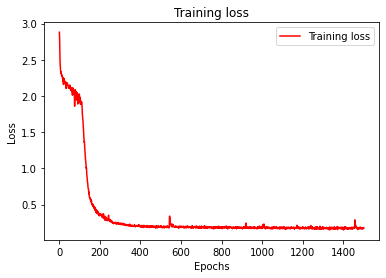

In [26]:
# Plotting training and validation loss for combined model
loss_values = history.history['loss']
# val_loss_values = history.history['val_loss']
epochs = range(1, len(history.history['loss'] )+ 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("com_model_loss.png")
plt.show()

In [27]:
#Save the model for every 2nd epoch

model.save(output_files+'pic2text_model_D1.h5')  # creates a HDF5 file 'my_model.h5'

# Evaluate model

In [ ]:
from keras.saving.save import load_model
model= load_model(output_files+'pic2text_model_D1.h5')

In [28]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    photo = np.array([photo])
    # seed the generation process
    in_text = ' '
    # iterate over the whole length of the sequence
    print('\nPrediction---->\n\n ', end='')
    for i in range(180):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo, sequence], verbose=0)
        # convert probability to integer
        yhat = np.argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += word + ' '
        # stop if we predict the end of the sequence
        print(word + ' ', end='')
        if word == '':
            break
    return in_text

In [29]:
from nltk.translate.bleu_score import corpus_bleu

# Evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for i in range(len(descriptions)):
        yhat = generate_desc(model, tokenizer, photos[i], max_length)
        # store actual and predicted
        print('\n\nReal---->\n\n' + y_test[i])
        actual.append([y_test[i].split()])
        predicted.append(yhat.split())
    # calculate BLEU score
    bleu = corpus_bleu(actual, predicted)
    return bleu, actual, predicted

# Eval on the first 10 samples
# bleu, actual, predicted = evaluate_model(model, texts[:10], train_features[:10], tokenizer, MAX_LEN)
bleu, actual, predicted = evaluate_model(model, y_test, features_test, tokenizer, 50)
print("BLUE score: ", bleu)


Prediction---->

 { { btn-inactive , btn-active , btn-inactive , btn-inactive } row { single { small-title , text , btn-orange } } row { single { small-title , text , btn-red } } row { quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-orange } } row { double { small-title , text , btn-orange } double { small-title , text , btn-red } } row { single { small-title , text , btn-red } } row { single { small-title , text , btn-red } } row { quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-orange } } row { double { small-title , text , btn-orange } double { small-title , text , btn-red } } row { single { small-title , text , btn-red } } row { single { small-title , text 

Real---->

header { btn-inactive , btn-active , btn-inactive , btn-inactiv

In [30]:
# !pip install session_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=2a20e0fb7420dbacb99e7c71e8ffb03fc5506385e47ddbd6a2ccb3ae17293a8b
  Stored in directory: /root/.cache/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [31]:
# generate requrements 
import session_info
session_info.show()